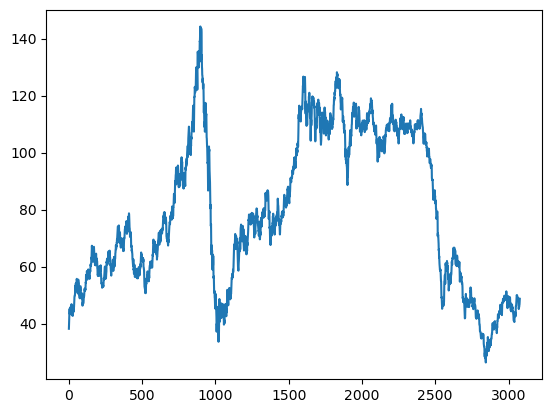

3078


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('SeriesSession13_a.csv', sep = ";",decimal = ",")
y = data.iloc[:,0]
y.plot()
plt.show()
print(len(y))

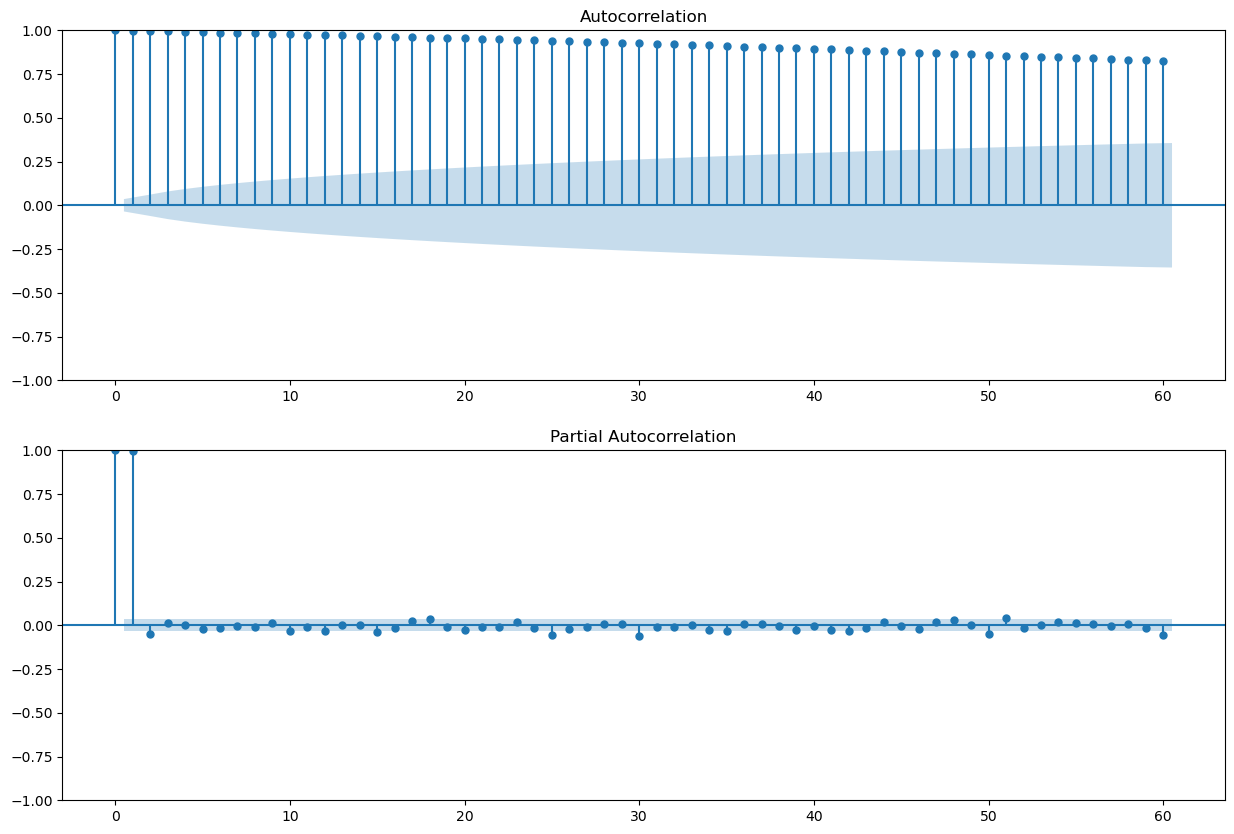

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
nlags = 60 # play with this parameter

fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(y, lags = nlags,  ax=ax[0])
plot_pacf(y, lags = nlags, method="ols",ax=ax[1])
plt.show()

In [27]:
s = 5 #seasonal parameter
import statsmodels.api as sm
from pmdarima.arima import ndiffs, nsdiffs

# Coincide con lo de R
print('Regular difference:', ndiffs(y, alpha = 0.05, test = 'adf'))
print('Seasonal difference:', nsdiffs(y, m = s, test = 'ocsb'))

Regular difference: 1
Seasonal difference: 0


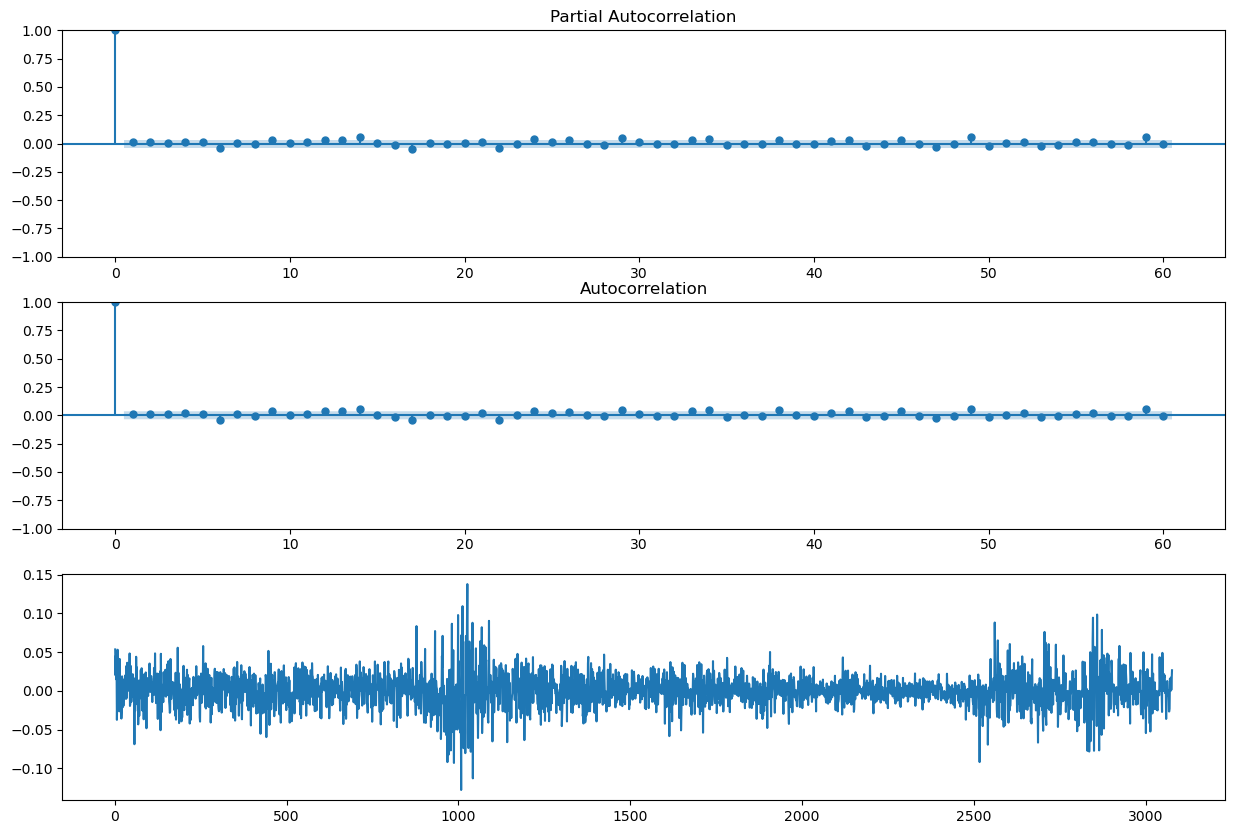

In [28]:
r = np.log(y).diff().dropna()

fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(r, lags = nlags, method="ols", ax=ax[0])
plot_acf(r, lags = nlags, ax=ax[1])
ax[2] = plt.plot(r)
plt.show()

In [29]:
print('Regular difference:', ndiffs(r, alpha = 0.05, test = 'adf'))
print('Seasonal difference:', nsdiffs(r, m = s, test = 'ocsb'))

Regular difference: 0
Seasonal difference: 0


In [30]:
box_test = sm.stats.acorr_ljungbox(r, lags=[30])
print("Box test for r:", box_test.iloc[0,0]) # Se parece a lo de R pero varía un poco
print("p-value:", box_test.iloc[0,1]) # Casi igual que en R

Box test for r: 59.042758898756006
p-value: 0.0012004373703688226


In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(r, order = (0,0,0))
model_fit=model.fit()
print(model_fit.summary())
# print("Coefficients",fit_fit.params)

arima_residuals=model_fit.resid

c:\Users\MMirogranada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MMirogranada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MMirogranada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:     Brent Dated spot price (usd/bbl)   No. Observations:                 3077
Model:                                        ARIMA   Log Likelihood                7545.389
Date:                              Thu, 02 Mar 2023   AIC                         -15086.777
Time:                                      16:56:04   BIC                         -15074.714
Sample:                                           0   HQIC                        -15082.444
                                             - 3077                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.398e-05      0.000      0.197      0.844      -0.001       0.001
sigma2         0.00

In [32]:
box_test = sm.stats.acorr_ljungbox(arima_residuals, lags=[30])
box_test2 = sm.stats.acorr_ljungbox(arima_residuals**2, lags=[30])
print("Residuals Box test:", box_test.iloc[0,0],"p-value:", box_test.iloc[0,1]) # 
print("Squared Residuals Box test:", box_test2.iloc[0,0],"p-value:", box_test2.iloc[0,1]) # 

Residuals Box test: 59.042758898756034 p-value: 0.0012004373703688124
Squared Residuals Box test: 2967.694442165511 p-value: 0.0


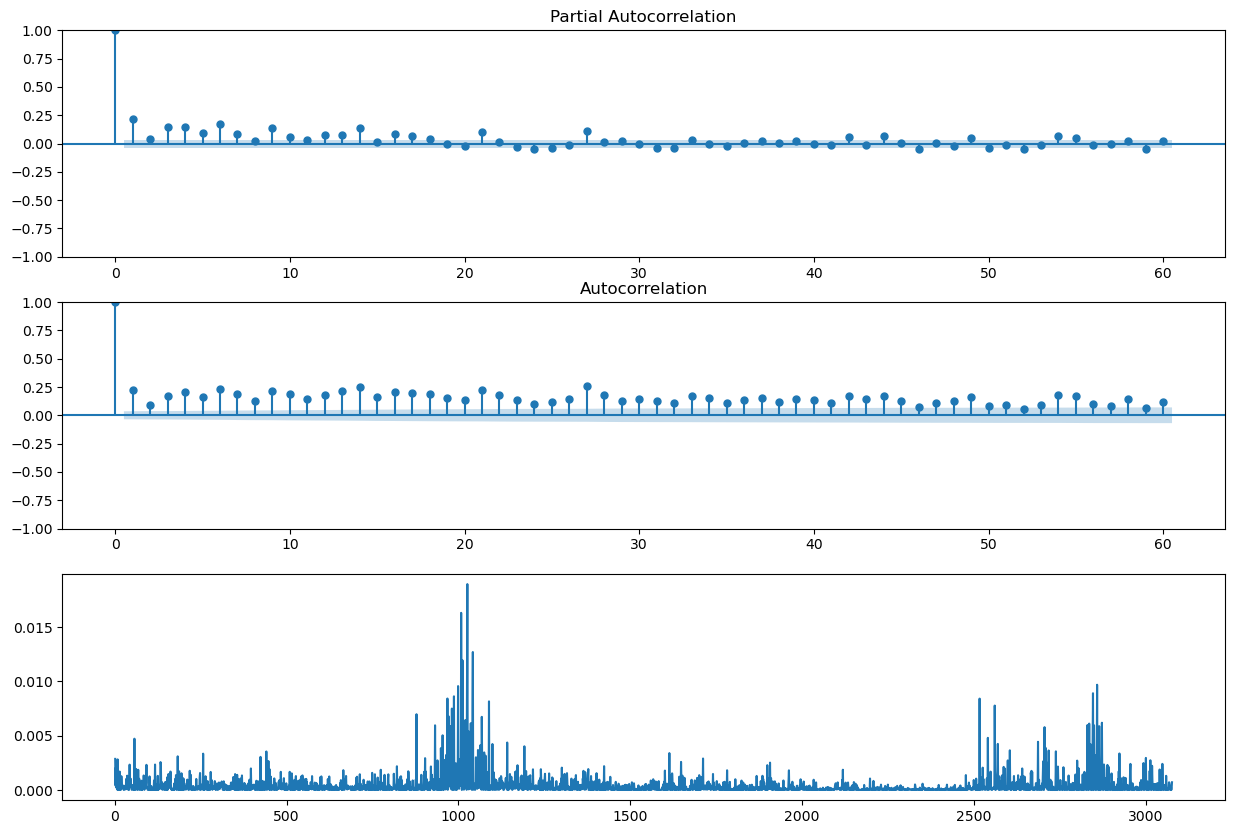

In [33]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(arima_residuals**2, lags = nlags, method="ols", ax=ax[0])
plot_acf(arima_residuals**2, lags = nlags, ax=ax[1])
ax[2] = plt.plot(r**2)
plt.show()

In [34]:
box_test = sm.stats.acorr_ljungbox(arima_residuals**2, lags=[20])
print("Box test for arima_residuals**2:", box_test.iloc[0,0]) # Se parece a lo de R pero varía un poco
print("p-value:", box_test.iloc[0,1]) # Casi igual que en R (creo que R tiene límite de número pequeño en 2.2 e-15 porque me ha aparecido ya varias veces)

Box test for arima_residuals**2: 2102.9056402965152
p-value: 0.0


Kurtosis 6.659341051219639
Skewness: 0.058208442928552734


(-0.062499532018429164, 0.06250951590973537)

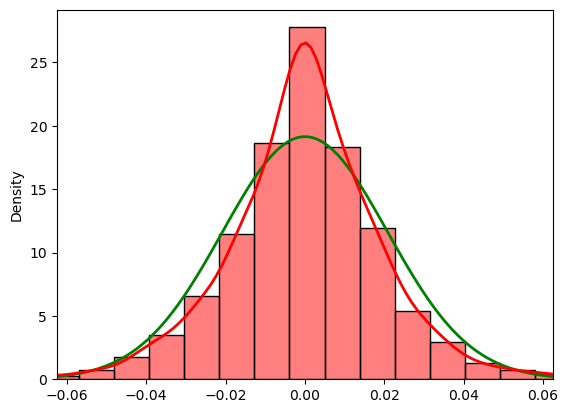

In [42]:
from scipy.stats import skew, kurtosis, shapiro
import scipy.stats as st
import seaborn as sns
# Así coincide con el de R el method = 'moment'

print("Kurtosis",kurtosis(arima_residuals, fisher = False))
print("Skewness:",skew(arima_residuals))

mu = np.mean(arima_residuals)
sigma = np.std(arima_residuals)
x = np.linspace(mu -3*sigma, mu + 3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = sns.histplot(arima_residuals, stat="density", color = "r",
                  kde = True, line_kws={'lw': 2}, bins = 30
                   ) # NEW

# ax = plt.hist(arima_residuals, density = True, range = (mu -4*sigma, mu + 4*sigma), color = "r")
# ax = sns.distplot(arima_residuals, hist = False, kde = True, kde_kws = {'linewidth':2},
#                  color = "blue")# OLD-DEPRECATD
ax.set_xlim(mu -3*sigma, mu + 3*sigma)

In [36]:
print("Shapiro test:",shapiro(arima_residuals)[0])
print("Shapiro p-value:",shapiro(arima_residuals)[1])

Shapiro test: 0.9597464203834534
Shapiro p-value: 2.061454745678849e-28


In [37]:
# Garch models estimation and prediction
%pip install arch


In [38]:
from arch import arch_model

# model_2 = arch_model(arima_residuals, mean='constant', vol='ARCH', p=7)
# model_2 = arch_model(arima_residuals, mean='constant', vol='GARCH', p=1, q=1)
#model_2_fit = model_2.fit()
#model_2_fit.summary()

model_2 = arch_model(r, mean='constant', vol='GARCH', p=1, q=1)
# model_2 = arch_model(r, mean='Zero', vol='GARCH', p=1, q=1,dist="StudentsT")
model_2_fit = model_2.fit()
model_2_fit.summary()




Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.5845174934634574e+19
Iteration:      2,   Func. Count:     18,   Neg. LLF: 881377414.7468452
Iteration:      3,   Func. Count:     31,   Neg. LLF: 901352561563463.4
Iteration:      4,   Func. Count:     41,   Neg. LLF: -7884.268918099061
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7884.268938126781
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 4


c:\Users\MMirogranada\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004341. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Constant Mean - GARCH Model Results                             
============================================================================================
Dep. Variable:     Brent Dated spot price (usd/bbl)   R-squared:                       0.000
Mean Model:                           Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                    GARCH   Log-Likelihood:                7884.27
Distribution:                                Normal   AIC:                          -15760.5
Method:                          Maximum Likelihood   BIC:                          -15736.4
                                                      No. Observations:                 3077
Date:                              Thu, Mar 02 2023   Df Residuals:                     3076
Time:                                      16:56:10   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.0070e-04  1.350e-04      2.228  2.589e-02 [3.617e-05,5.652e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.6819e-06  9.479e-11  9.160e+04      0.000 [8.682e-06,8.682e-06]
alpha[1]       0.0500  4.553e-03     10.981  4.730e-28 [4.108e-02,5.892e-02]
beta[1]        0.9300  3.744e-03    248.396      0.000     [  0.923,  0.937]
============================================================================

Covariance estimator: robust
"""

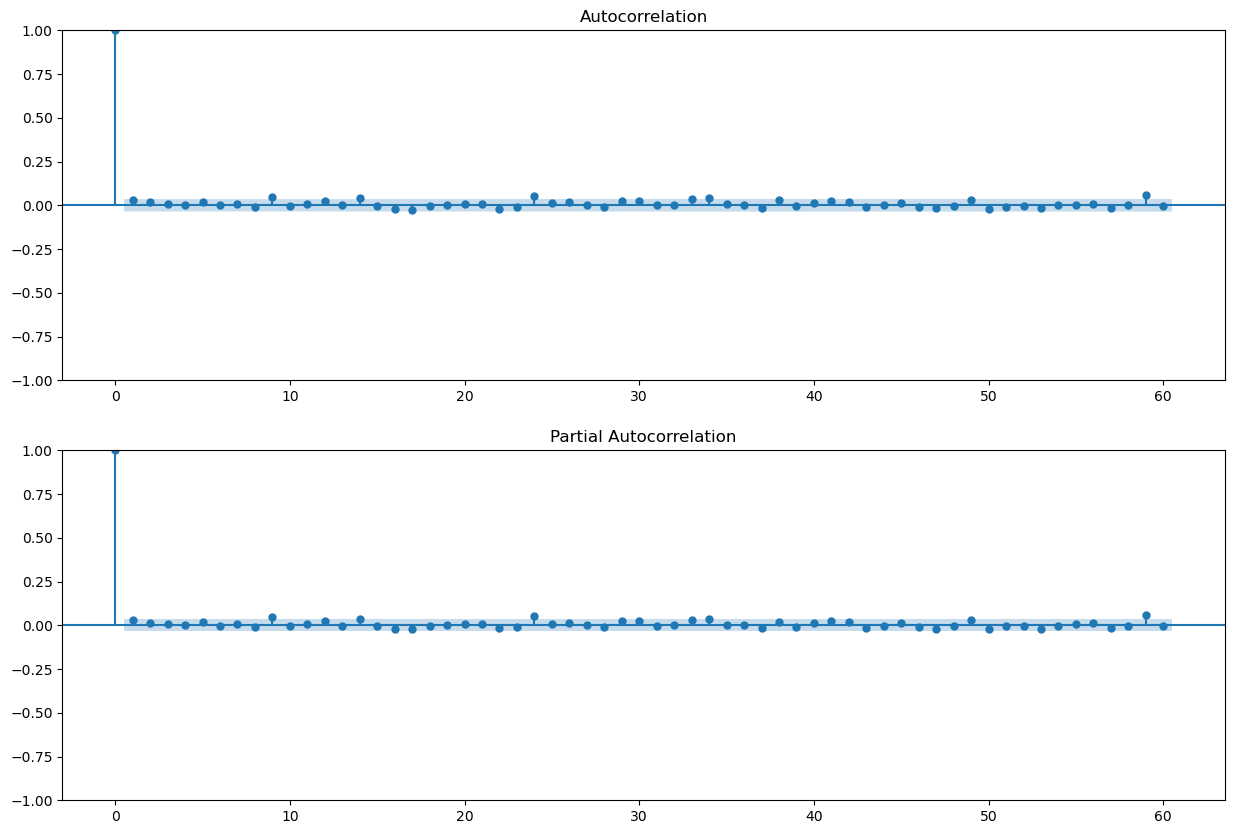

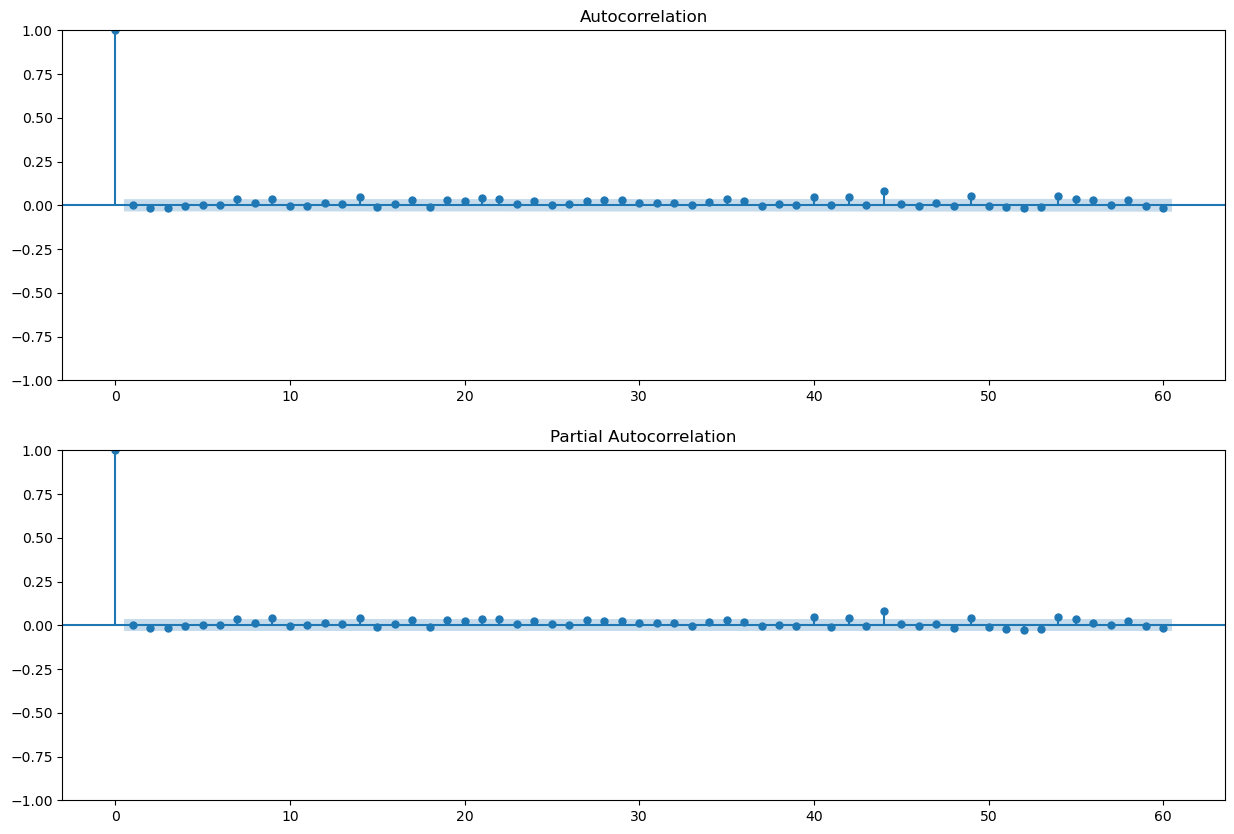

Residuals Box test: 38.554927525799314 p-value: 0.13601596246584252
Squared Residuals Box test: 44.795890184455985 p-value: 0.040322567251613414


In [39]:
std_resid = model_2_fit.resid / model_2_fit.conditional_volatility
fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(std_resid, lags = nlags,  ax=ax[0])
plot_pacf(std_resid, lags = nlags, method="ols",ax=ax[1])
plt.show()

fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(std_resid**2, lags = nlags,  ax=ax[0])
plot_pacf(std_resid**2, lags = nlags, method="ols",ax=ax[1])
plt.show()

box_test = sm.stats.acorr_ljungbox(std_resid, lags=[30])
box_test2 = sm.stats.acorr_ljungbox(std_resid**2, lags=[30])
print("Residuals Box test:", box_test.iloc[0,0],"p-value:", box_test.iloc[0,1]) # 
print("Squared Residuals Box test:", box_test2.iloc[0,0],"p-value:", box_test2.iloc[0,1]) # 

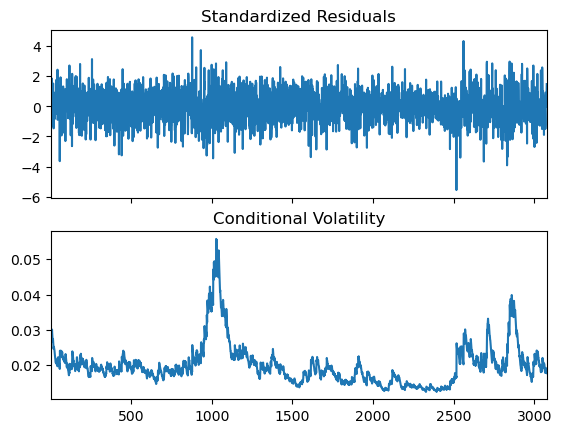

In [40]:
# Plot fitted results
model_2_fit.plot()
plt.show()

In [43]:
import pandas as pd
import math
# Make 5-period ahead forecast
model_2_fit_forecast = model_2_fit.forecast(horizon = 5, reindex = False)
volatility = np.sqrt(model_2_fit_forecast.variance.values[-1:][0])
print("Volatility:",volatility)

Volatility: [0.0183592  0.01841196 0.01846353 0.01851392 0.01856317]
